# according to a website

[url](https://myenigma.hatenablog.com/entry/2015/09/07/214600)

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @brief 最小二乗法による円フィッティングモジュール
# @author: Atsushi Sakai

import numpy as np
import math

def CircleFitting(x,y):
    """最小二乗法による円フィッティングをする関数
        input: x,y 円フィッティングする点群

        output  cxe 中心x座標
                cye 中心y座標
                re  半径

        参考
        一般式による最小二乗法（円の最小二乗法）　画像処理ソリューション
        http://imagingsolution.blog107.fc2.com/blog-entry-16.html
    """

    sumx  = sum(x)
    sumy  = sum(y)
    sumx2 = sum([ix ** 2 for ix in x])
    sumy2 = sum([iy ** 2 for iy in y])
    sumxy = sum([ix * iy for (ix,iy) in zip(x,y)])

    F = np.array([[sumx2,sumxy,sumx],
                  [sumxy,sumy2,sumy],
                  [sumx,sumy,len(x)]])

    G = np.array([[-sum([ix ** 3 + ix*iy **2 for (ix,iy) in zip(x,y)])],
                  [-sum([ix ** 2 *iy + iy **3 for (ix,iy) in zip(x,y)])],
                  [-sum([ix ** 2 + iy **2 for (ix,iy) in zip(x,y)])]])

    T=np.linalg.inv(F).dot(G)

    cxe=float(T[0]/-2)
    cye=float(T[1]/-2)
    re=math.sqrt(cxe**2+cye**2-T[2])
    #print (cxe,cye,re)
    return (cxe,cye,re)

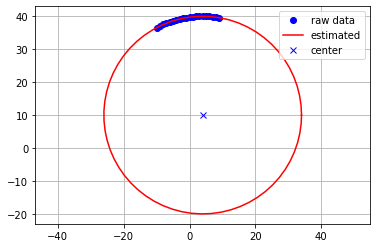

4.0 9.999999999985448 29.99999999999515


In [4]:
import matplotlib.pyplot as plt
#推定する円パラメータ
cx=4;   #中心x
cy=10;  #中心y
r=30;   #半径

#円の点群の擬似情報
plt.figure()
x=range(-10,10);
y=[]
for xt in x:
    y.append(cy+math.sqrt(r**2-(xt-cx)**2))

#円フィッティング
(cxe,cye,re)=CircleFitting(x,y)

#円描画
theta=np.arange(0,2*math.pi,0.1)
xe=[]
ye=[]
for itheta in theta:
    xe.append(re*math.cos(itheta)+cxe)
    ye.append(re*math.sin(itheta)+cye)
xe.append(xe[0])
ye.append(ye[0])

plt.plot(x,y,"ob",label="raw data")
plt.plot(xe,ye,"-r",label="estimated")
plt.plot(cx,cy,"xb",label="center")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()

print(cxe,cye,re)

# 3D sphere ver.

1. Fitting to eq.

$$
(x-a)^2 + (y-b)^2 + (z-c)^2 = r^2
$$

2. input point data
    i = 0:n

$$
\begin{bmatrix}
	X_i & Y_i
\end{bmatrix}
$$

3. eq. to be satisfied

$$
\Sigma_i\left\{(X_i-a)^2 + (Y_i-b)^2 + (Z_i-c)^2 - r^2\right\}^2 = 0
$$


$$
\Sigma_i\left\{{X_i}^2 + {Y_i}^2 + {Z_i}^2 + AX_i + BY_i + CZ_i + D \right\}^2 = 0
$$
while, 
$$
\begin{array}{ll}
	A = -2a\\
	B = -2b\\
	C = -2c\\
	D = a^2 + b^2 + c^2 - r^2\\
\end{array}
$$

4. partial derivatives by A,B,C, and D

$$
\begin{bmatrix}
	A\Sigma_i{X_i}^2 + B\Sigma_i{X_iY_i} + C\Sigma_i{Z_iX_i} + D\Sigma_i{X_i} + \Sigma_i\left({X_i}^3+X_i{Y_i}^2+{Z_i}^2X_i\right) = 0 \\
	A\Sigma_i{X_iY_i} + B\Sigma_i{Y_i}^2 + C\Sigma_i{Z_iY_i} + D\Sigma_i{Y_i} + \Sigma_i\left({X_i}^2Y_i+{Y_i}^3+Y_i{Z_i}^2\right) = 0 \\
	A\Sigma_i{X_iZ_i} + B\Sigma_i{Y_iZ_i} + C\Sigma_i{Z_i}^2 + D\Sigma_i{Z_i} + \Sigma_i\left(Z_i{X_i}^2+{Y_i}^2Z_i+{Z_i}^3\right) = 0 \\
	A\Sigma_i{X_i} + B\Sigma_i{Y_i} + C\Sigma_i{Z_i} + D + \Sigma_i\left({X_i}^2+{Y_i}^2+{Z_i}^2\right) = 0
\end{bmatrix}
$$

$$
\begin{bmatrix}
	\Sigma_i{X_i}^2 + \Sigma_i{X_iY_i} + \Sigma_i{Z_iX_i} + \Sigma_i{X_i} \\
	\Sigma_i{X_iY_i} + \Sigma_i{Y_i}^2 + \Sigma_i{Z_iY_i} + \Sigma_i{Y_i} \\
	\Sigma_i{X_iZ_i} + \Sigma_i{Y_iZ_i} + \Sigma_i{Z_i}^2 + \Sigma_i{Z_i} \\
	\Sigma_i{X_i} + \Sigma_i{Y_i} + \Sigma_i{Z_i} + 1
\end{bmatrix}\begin{bmatrix}
A \\
B \\
C \\
D
\end{bmatrix} = \begin{bmatrix}
- \Sigma_i\left({X_i}^3+X_i{Y_i}^2+{Z_i}^2X_i\right) \\
- \Sigma_i\left({X_i}^2Y_i+{Y_i}^3+Y_i{Z_i}^2\right) \\
- \Sigma_i\left(Z_i{X_i}^2+{Y_i}^2Z_i+{Z_i}^3\right) \\
- \Sigma_i\left({X_i}^2+{Y_i}^2+{Z_i}^2\right)
\end{bmatrix}
$$

$$
F T = G
$$

$$
T = \begin{bmatrix}
A \\
B \\
C \\
D
\end{bmatrix} = F^{-1}G
$$




In [82]:
import numpy as np
import math

def CircleFitting3D(x,y,z):

    # first power
    sumx  = sum(x)
    sumy  = sum(y)
    sumz  = sum(z)
    # second power
    sumx2 = sum([ix ** 2 for ix in x])
    sumy2 = sum([iy ** 2 for iy in y])
    sumz2 = sum([iz ** 2 for iz in z])
    sumxy = sum([ix * iy for (ix,iy) in zip(x,y)])
    sumyz = sum([iy * iz for (iy,iz) in zip(y,z)])
    sumzx = sum([iz * ix for (iz,ix) in zip(z,x)])

    F = np.array([[sumx2,sumxy,sumzx,sumx],
                  [sumxy,sumy2,sumyz,sumy],
                  [sumzx,sumyz,sumz2,sumz],
                  [sumx,sumy,sumz,len(x)]])

    G = np.array([[-sum([ix**3 + ix*iy**2 + iz**2*ix for (ix,iy,iz) in zip(x,y,z)])],
                  [-sum([ix**2*iy + iy**3 + iy*iz**2 for (ix,iy,iz) in zip(x,y,z)])],
                  [-sum([iz*ix**2 + iy**2*iz + iz**3 for (ix,iy,iz) in zip(x,y,z)])],
                  [-sum([ix**2 + iy**2 + iz**2 for (ix,iy,iz) in zip(x,y,z)])]])

    T=np.linalg.inv(F).dot(G)

    cxe=float(T[0]/-2)
    cye=float(T[1]/-2)
    cze=float(T[2]/-2)
    re=math.sqrt(cxe**2+cye**2+cze**2-T[3])
    #print (cxe,cye,re)
    return (cxe,cye,cze,re)

5.7142857142853245 27.857142857142776 37.85714285714312 25.614887252916144


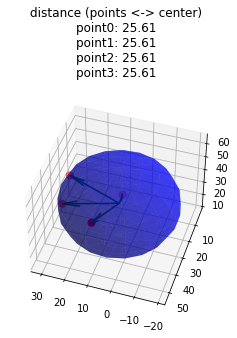

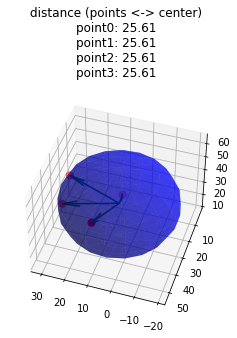

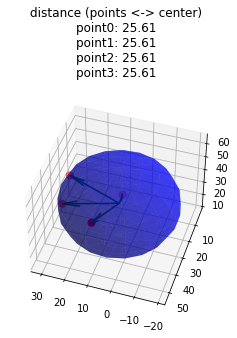

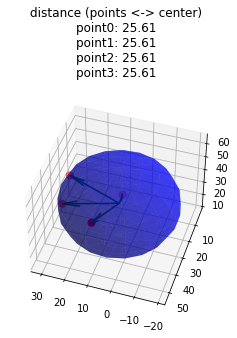

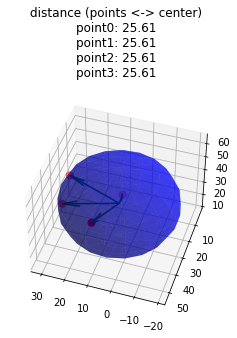

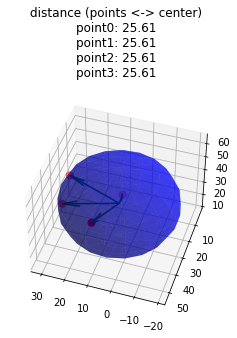

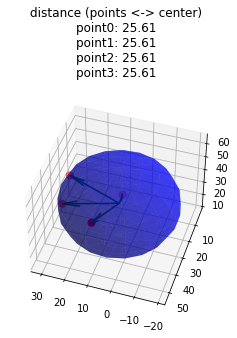

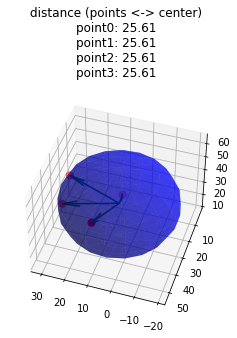

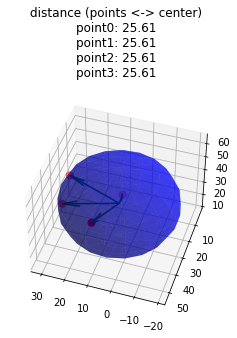

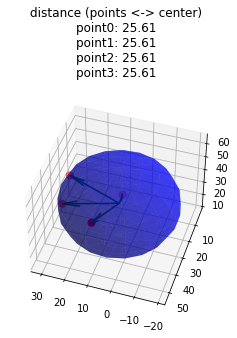

In [83]:

def drawSphere(a,b,c,r):
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = r * np.cos(u)*np.sin(v) + a
    y = r * np.sin(u)*np.sin(v) + b
    z = r * np.cos(v) + c
    ax.plot_surface(x,y,z,color="b", alpha=0.5) # surface

    
# test data
x = np.array([10,10,30,30])
y = np.array([10,50,20,30])
z = np.array([20,50,40,30])

# fitting sphere
cxe,cye,cze,re = CircleFitting3D(x,y,z)
print(cxe,cye,cze,re)

# drawing the fitting result
for i in range(10):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d", facecolor="w")
    drawSphere(cxe,cye,cze,re)             # sphere
    ax.scatter3D(x, y, z, s=50, color="r") # test data
    title = 'distance (points <-> center)\n'
    # draw quiver and calculate distance from a point to the center
    for i, (jx,jy,jz) in enumerate(zip(x,y,z)):
        ax.quiver(cxe, cye, cze, jx-cxe, jy-cye, jz-cze, color="g")   
        d = math.sqrt((jx-cxe)**2 + (jy-cye)**2 + (jz-cze)**2)
        title += 'point' + str(i) + ': ' + str(round(d,2)) + "\n"
    ax.view_init(elev=45, azim=i*36)
    ax.set_title(title)
    plt.show()